# Projet 2 : Analysez des données de systèmes éducatifs

## Sommaire
* [Importation des bibliothèques](#import_bib)
* [Exploration de EdStatsData](#exp_donnees)
    * [Variable du tableau créée](#var_tab)
    * [Obtention d'informations générales sur le jeu de données](#info_general)
    * [Configuration du Pandas](#cfg_pandas)
    * [Vérification des colonnes](#verif_col)
    * [Vérification des données manquantes](#verif_don_manq)
* [Nettoyage de EdStatsData](#nett_donnees)
    * [Suppression des lignes avec des données insuffisantes](#supp_insuff)
    * [Suppression des indicateurs spécifiques au genre](#supp_genre)
    * [Fonction pour vérifier la taille relative du dataframe](#taille_df)
    * [Élimination des régions](#elim_reg)
    * [Filtrage par population](#filt_pop)
    * [Filtrage par utilisateurs de l'internet](#filt_inet)
    * [Sélection finale des indicateurs pertinents](#selec_indic)
* [Analyse de EdStatsData](#analyse_donnees)
    * [Classement des pays par pourcentage de données manquantes](#country_perc_miss)
    * [Création d'indicateurs composites](#compos_indic)
    * [Conversion des indicateurs en pourcentage](#convers_indic_perc)
    * [Filtrage des indicateurs obsolètes](#filt_indic_obsol)
    * [Génération de graphiques et de dataframes par pays](#gen_graphs_dfs)
    * [Génération de graphiques par indicateur](#gen_graphs_indic)
    * [Attribution d'un score d'attractivité à chaque pays](#score_attrac)

## Importation des bibliothèques <a class="anchor" id="import_bib"></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math
import os
import statistics
import scipy

## Exploration de EdStatsData <a class="anchor" id="exp_donnees"></a>

### Variable du tableau créée <a class="anchor" id="var_tab"></a>
Le fichier source CSV est lu dans un objet de tableau et les cinq premières colonnes sont affichées.

In [41]:
edstats = pd.read_csv('Edstats_csv/EdStatsData.csv')
edstats.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Obtention d'informations générales sur le jeu de données <a class="anchor" id="info_general"></a>
- Le nombre de lignes et de colonnes est imprimé.
- Une méthode est appelée qui produit des informations de base sur le tableau, y compris le nombre d'entrées dans chaque colonne et leurs types de données.

In [42]:
edstats.shape

(886930, 70)

In [43]:
edstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

### Configuration du Pandas <a class="anchor" id="cfg_pandas"></a>
- Par défaut, Pandas affiche un maximum de 20 colonnes, mais le jeu de données à manipuler en contient 70, la limite de colonne est donc supprimée.
- Pour permettre la sortie complète d'une opération de somme ultérieure, le nombre maximum de lignes à afficher est défini sur le nombre de colonnes.

In [44]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 70)

### Vérification des colonnes <a class="anchor" id="verif_col"></a>
Les noms des colonnes sont affichés.

In [45]:
edstats.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

Les séparateurs de fin de ligne dans le fichier CSV ont créé une colonne superflue, celle-ci est supprimée.

In [46]:
edstats = edstats.drop("Unnamed: 69", axis=1)
edstats.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

### Vérification des données manquantes <a class="anchor" id="verif_don_manq"></a>
* Pourcentage de valeurs manquantes pour chaque colonne :
    * La première des commandes suivantes crée un dataframe `edstats_missing`, un tableau booléen de mêmes dimensions que edstats avec 'True' s'il n'y a pas de données dans la cellule correspondante.
    * La deuxième commande génère une série avec les noms de chaque colonne et le nombre total de valeurs manquantes dans chaque colonne qui est ensuite converti en pourcentages.

In [47]:
edstats_missing = edstats.isna()
edstats_missing.sum() / len(edstats) * 100

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
Indicator Code     0.000000
1970              91.849639
1971              95.993258
1972              95.984012
1973              95.992356
1974              95.971497
1975              90.156382
1976              95.773849
1977              95.763589
1978              95.763364
1979              95.849842
1980              89.951631
1981              95.627953
1982              95.770692
1983              95.663694
1984              95.647233
1985              89.819264
1986              95.560867
1987              95.643286
1988              95.653321
1989              95.767422
1990              85.973527
1991              91.607342
1992              91.482642
1993              91.454455
1994              91.266278
1995              85.189248
1996              91.340128
1997              91.718287
1998              90.426076
1999              86.601085
2000              80.080051
2001              86

- Les années clés les plus pertinentes pour l'analyse sont sélectionnées, celles-ci couvrent 20 ans dans le passé jusqu'à 10 ans dans le futur.
- Un 'slice' du tableau booléen des données manquantes est extraite pour les années clés.

In [48]:
key_yrs = ["2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011",
           "2012", "2013", "2014", "2015", "2016", "2017", "2020", "2025", "2030"]
edstats_missing_key_yrs = edstats_missing[key_yrs]
edstats_missing_key_yrs.head()

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True


Une somme de cellules vides est prise pour chaque ligne.

In [49]:
key_yrs_total_missing = edstats_missing_key_yrs.sum(axis=1)
key_yrs_total_missing

0         19
1         19
2         19
3         19
4          6
          ..
886925    17
886926    17
886927    17
886928    17
886929    17
Length: 886930, dtype: int64

Une liste d'indices est créée pour les lignes ayant dix cellules vides ou plus pour les années clés.

In [50]:
indices_insuff_key_yr_data = [i for i in range(len(key_yrs_total_missing.values)) if key_yrs_total_missing.values[i] >= 10]
display(indices_insuff_key_yr_data[0:10])

[0, 1, 2, 3, 8, 9, 10, 11, 24, 25]

## Nettoyage de EdStatsData <a class="anchor" id="nett_donnees"></a>

### Suppression des lignes avec des données insuffisantes <a class="anchor" id="supp_insuff"></a>

In [51]:
edstats_suff_key_yr_data = edstats.drop(edstats.index[indices_insuff_key_yr_data])

### Suppression des indicateurs spécifiques au genre <a class="anchor" id="supp_genre"></a>

Une liste de tous les indicateurs est générée.

In [52]:
indicators_w_suff_data = list(set(edstats_suff_key_yr_data['Indicator Name'].values.tolist()))
display(indicators_w_suff_data[1:10])

['Enrolment in early childhood education, female (number)',
 'Pupil/trained teacher ratio in secondary education (headcount basis)',
 'Population, ages 15-64 (% of total)',
 'Labor force with intermediate education (% of total)',
 'Percentage of enrolment in post-secondary non-tertiary education in private institutions (%)',
 'Population of the official age for tertiary education, male (number)',
 'Percentage of repeaters in Grade 1 of lower secondary general education, male (%)',
 'Government expenditure in pre-primary institutions as % of GDP (%)',
 'Drop-out rate from Grade 1 of lower secondary general education, both sexes (%)']

Une liste d'indicateurs ne contenant pas les mots « male » ou « female » est extraite.

In [53]:
mf_regex = re.compile(r'^(|.*\s)([Mm]ale|[Ff]emale)(|[\s,].*)$')
indicators_suff_data_no_sex = [i for i in indicators_w_suff_data if not mf_regex.match(i)]
display(indicators_suff_data_no_sex[1:10])

['Pupil/trained teacher ratio in secondary education (headcount basis)',
 'Population, ages 15-64 (% of total)',
 'Labor force with intermediate education (% of total)',
 'Percentage of enrolment in post-secondary non-tertiary education in private institutions (%)',
 'Government expenditure in pre-primary institutions as % of GDP (%)',
 'Drop-out rate from Grade 1 of lower secondary general education, both sexes (%)',
 'Enrolment in post-secondary non-tertiary education, public institutions, both sexes (number)',
 'Government expenditure per primary student as % of GDP per capita (%)',
 'Government expenditure per lower secondary student (US$)']

Toutes les lignes des indicateurs spécifiques au genre sont enlevés.

In [54]:
edstats_suff_data_no_sex = edstats_suff_key_yr_data[edstats_suff_key_yr_data['Indicator Name'].isin(indicators_suff_data_no_sex)]

### Fonction pour vérifier la taille relative du dataframe <a class="anchor" id="taille_df"></a>

La fonction suivante donne la taille du dataframe nettoyé en pourcentage de l'original.

In [55]:
def compare_to_edstats(df):
    print(str(round(len(df) / len(edstats) * 100, 2)) + "% remaining of original EdStats dataset")

compare_to_edstats(edstats_suff_data_no_sex)

5.48% remaining of original EdStats dataset


### Élimination des régions <a class="anchor" id="elim_reg"></a>

Toutes les lignes des régions géographiques sont supprimées, ne laissant que des données spécifiques au pays.

In [56]:
region_country_codes = ["ARB", "EAP", "EAS", "ECA", "ECS", "EMU", "EUU", "HIC", "HPC", "LAC", "LCN", "LDC", "LIC",
                        "LMC", "LMY", "MEA", "MIC", "MNA", "NAC", "OED", "SAS", "SSA", "SSF", "UMC", "WLD"]
edstats_suff_data_no_sex_region = edstats_suff_data_no_sex[~edstats_suff_data_no_sex['Country Code'].isin(region_country_codes)]
edstats_suff_data_no_sex_region.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
92327,Afghanistan,AFG,Duration of compulsory education (years),SE.COM.DURS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92758,Afghanistan,AFG,Enrolment in Grade 1 of lower secondary genera...,UIS.E.2.GPV.G1.T,38844.0,40868.0,43644.0,46386.0,49282.0,56555.0,69782.0,70712.0,72997.0,NaN,86774.0,93254.0,44771.0,NaN,52607.0,53109.0,52371.0,NaN,53708.0,56583.0,NaN,NaN,NaN,74962.0,NaN,114002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129419.0,189028.0,208145.0,NaN,348498.0,NaN,563596.0,594126.0,594073.0,622065.0,630990.0,652756.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92760,Afghanistan,AFG,"Enrolment in Grade 1 of primary education, bot...",UIS.E.1.G1,132066.0,143743.0,154080.0,157621.0,168449.0,168884.0,174099.0,187835.0,199875.0,NaN,236940.0,244852.0,70835.0,NaN,98763.0,108733.0,128146.0,NaN,147970.0,140159.0,NaN,NaN,NaN,141442.0,NaN,292759.0,NaN,NaN,NaN,NaN,NaN,NaN,1330567.0,1410344.0,NaN,903979.0,NaN,811282.0,NaN,948131.0,1032665.0,1087009.0,1159081.0,1179675.0,1159427.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92784,Afghanistan,AFG,"Enrolment in lower secondary education, both s...",UIS.E.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202463.0,NaN,291312.0,420950.0,461349.0,735697.0,750492.0,1063816.0,1273188.0,1476813.0,1465558.0,1534469.0,1569153.0,1633965.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92792,Afghanistan,AFG,"Enrolment in lower secondary general, both sex...",UIS.E.2.GPV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202463.0,287490.0,291312.0,420950.0,461349.0,735697.0,750492.0,1063816.0,1273188.0,1476813.0,1465558.0,1534469.0,1569153.0,1633965.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
compare_to_edstats(edstats_suff_data_no_sex_region)

5.03% remaining of original EdStats dataset


### Filtrage par population <a class="anchor" id="filt_pop"></a>

- Un series d'indicateurs de la population totale est extraite et convertie en un list.
- Un dictionary est créé pour contenir les chiffres de population les plus récents.
- Le list est itérée pour remplir le dictionary.
- Le dictionary est transformé en series.

In [58]:
total_pops = edstats_suff_data_no_sex_region.loc[edstats_suff_data_no_sex_region['Indicator Name'] == 'Population, total']
total_pops_matrix = total_pops.values.tolist()
latest_pops = {}
for i in total_pops_matrix:
    last_non_nan = 0.0
    for j in i:
        if not pd.isna(j):
            last_non_nan = j
    latest_pops[i[0]] = last_non_nan
latest_pops = pd.Series(latest_pops)
display(latest_pops)

Afghanistan              34656032.0
Albania                   2876101.0
Algeria                  40606052.0
American Samoa              55599.0
Andorra                     77281.0
                            ...    
Virgin Islands (U.S.)      102951.0
West Bank and Gaza        4551566.0
Yemen, Rep.              27584213.0
Zambia                   16591390.0
Zimbabwe                 16150362.0
Length: 215, dtype: float64

Un histogramme est généré avec 200 bins pour visualiser la répartition des pays par taille de population.

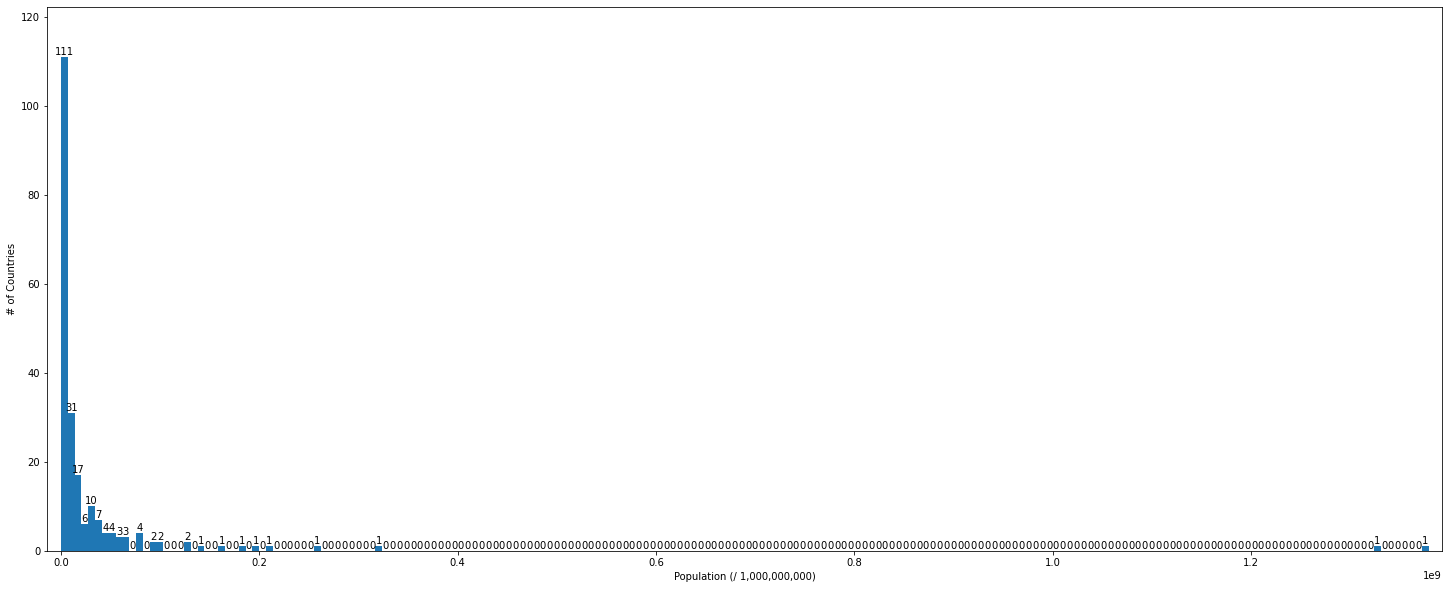

In [59]:
plt.figure(figsize=(25, 10))
values, bins, bars = plt.hist(latest_pops, bins=200)
plt.xlabel("Population (/ 1,000,000,000)")
plt.ylabel("# of Countries")
plt.bar_label(bars, fontsize=10)
plt.margins(x=0.01, y=0.1)
plt.show()

Le series des populations totales est triée par ordre croissant.

In [60]:
latest_pops_sorted = latest_pops.sort_values(ascending=True)
latest_pops_sorted

Tuvalu                      1.109700e+04
Palau                       2.150300e+04
St. Martin (French part)    3.126400e+04
San Marino                  3.320300e+04
Gibraltar                   3.440800e+04
                                ...     
Brazil                      2.076529e+08
Indonesia                   2.611155e+08
United States               3.231275e+08
India                       1.324171e+09
China                       1.378665e+09
Length: 215, dtype: float64

Les pays du bin de population le plus bas du graphique précédent sont rejetés. Il en résulte une taille minimale de la population d'environ 7 millions. Ce nombre a été choisi pour inclure des pays potentiellement intéressants comme Israël et la région administrative spéciale de Hong Kong.

In [61]:
latest_pops_sorted_trimmed = latest_pops_sorted.drop(latest_pops_sorted.index[0:111])
latest_pops_sorted_trimmed

Serbia                  7.057412e+06
Bulgaria                7.127822e+06
Hong Kong SAR, China    7.346700e+06
Sierra Leone            7.396190e+06
Togo                    7.606374e+06
                            ...     
Brazil                  2.076529e+08
Indonesia               2.611155e+08
United States           3.231275e+08
India                   1.324171e+09
China                   1.378665e+09
Length: 104, dtype: float64

Un list de pays suffisamment peuplés est créée.

In [62]:
list_high_pop_countries = latest_pops_sorted_trimmed.keys().tolist()
print(list_high_pop_countries)

['Serbia', 'Bulgaria', 'Hong Kong SAR, China', 'Sierra Leone', 'Togo', 'Papua New Guinea', 'Switzerland', 'Israel', 'Tajikistan', 'Austria', 'Honduras', 'United Arab Emirates', 'Jordan', 'Belarus', 'Azerbaijan', 'Hungary', 'Sweden', 'Portugal', 'Burundi', 'Czech Republic', 'Dominican Republic', 'Greece', 'Haiti', 'Benin', 'Bolivia', 'South Sudan', 'Belgium', 'Tunisia', 'Cuba', 'Rwanda', 'Guinea', 'Somalia', 'Chad', 'Senegal', 'Cambodia', 'Zimbabwe', 'Ecuador', 'Guatemala', 'Zambia', 'Netherlands', 'Kazakhstan', 'Chile', 'Mali', 'Malawi', 'Syrian Arab Republic', 'Burkina Faso', 'Romania', 'Niger', 'Sri Lanka', 'Cameroon', "Cote d'Ivoire", 'Australia', 'Madagascar', 'Korea, Dem. People’s Rep.', 'Yemen, Rep.', 'Ghana', 'Angola', 'Mozambique', 'Nepal', 'Malaysia', 'Venezuela, RB', 'Peru', 'Uzbekistan', 'Saudi Arabia', 'Afghanistan', 'Morocco', 'Canada', 'Iraq', 'Poland', 'Sudan', 'Algeria', 'Uganda', 'Argentina', 'Ukraine', 'Spain', 'Kenya', 'Colombia', 'Korea, Rep.', 'Myanmar', 'Tanzania'

Les pays dont la population est insuffisante sont supprimés du dataframe de travail.

In [63]:
edstats_suff_data_no_sex_region_high_pop = edstats_suff_data_no_sex[edstats_suff_data_no_sex['Country Name'].isin(list_high_pop_countries)]

In [64]:
compare_to_edstats(edstats_suff_data_no_sex_region_high_pop)

2.85% remaining of original EdStats dataset


### Filtrage par utilisateurs de l'internet <a class="anchor" id="filt_inet"></a>

Les étapes précédentes réalisées avec l'indicateur de population sont répétées avec un indicateur des utilisateurs de l'internet. L'histogramme est divisé en 100 bins afin de visualiser le nombre de pays dans chaque centile.

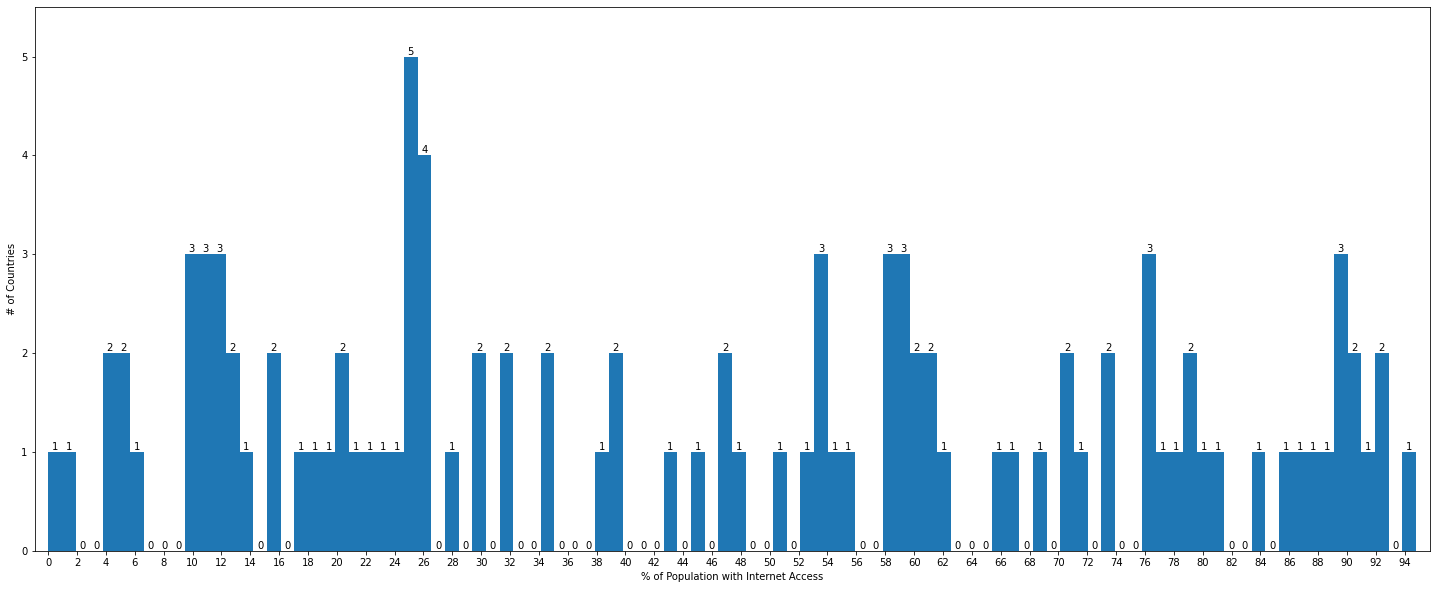

In [65]:
inet_usr_pct = edstats_suff_data_no_sex_region_high_pop.loc[edstats_suff_data_no_sex_region_high_pop['Indicator Name'] == 'Internet users (per 100 people)']
inet_usr_pct_matrix = inet_usr_pct.values.tolist()
latest_inet_usr_pcts = {}
for i in inet_usr_pct_matrix:
    last_non_nan = 0.0
    for j in i:
        if not pd.isna(j):
            last_non_nan = j
    latest_inet_usr_pcts[i[0]] = last_non_nan
latest_inet_usr_pcts = pd.Series(latest_inet_usr_pcts)
plt.figure(figsize=(25, 10))
values, bins, bars = plt.hist(latest_inet_usr_pcts, bins=100)
plt.xlabel("% of Population with Internet Access")
plt.ylabel("# of Countries")
plt.xticks(np.arange(0, 100, 2.0))
plt.bar_label(bars, fontsize=10)
plt.margins(x=0.01, y=0.1)
plt.show()

Les pays dont moins de 65 % de la population ayant accès à Internet sont éliminés, car si moins de 2/3 de la population y avait accès, il pourrait y avoir une clientèle insuffisante pour les services en ligne proposés.

In [66]:
countries_insuff_inet_usrs = []
for label, value in latest_inet_usr_pcts.iteritems():
    if value < 65.0:
        countries_insuff_inet_usrs.append(label)
edstats_suff_data_inet_no_sex_region_high_pop = \
    edstats_suff_data_no_sex_region_high_pop[~edstats_suff_data_no_sex_region_high_pop['Country Name'].isin(countries_insuff_inet_usrs)]
compare_to_edstats(edstats_suff_data_inet_no_sex_region_high_pop)

1.07% remaining of original EdStats dataset


### Sélection finale des indicateurs pertinents <a class="anchor" id="selec_indic"></a>

* Plusieurs variables sont créées contenant les indicateurs les plus prometteurs pour diverses caractéristiques intéressantes, y compris :
    * Population en âge d'accéder aux études secondaires et tertiaires
        * Celle-ci sera comparée à la population totale et à la population scolarisée afin de déterminer les ratios scolarisables/scolarisés et scolarisables/population totale.
    * Population active
        * Ceci sera utilisé pour convertir l'indicateur de réussite scolaire, qui est exprimé en pourcentage de la population active.
    * Population totale
        * Une population plus importante implique une clientèle potentielle plus importante.
    * Pourcentage de la population ayant accès à Internet
        * Puisque l'entreprise propose des contenus de formation en ligne ses clients ont besoin d'un accès à Internet.
    * Nombre de personnes inscrites dans l'enseignement secondaire et supérieur
        * Voir ci-dessus.
    * Pourcentage de la population ayant terminé des programmes secondaires et tertiaires
        * Cela sera comparé au revenu national brut pour déterminer l'impact de l'éducation sur le potentiel de gain.
    * Statut économique moyen de la population
        * Ceux qui ont un revenu disponible plus élevé seront plus en mesure de payer les services proposés.
* Une fonction est construite qui affiche le pourcentage de données manquantes dans les années clés pour chacun des indicateurs potentiels afin de choisir entre eux.
* La fonction est testée.

In [67]:
pop_by_age = ['Population, age 11, total', 'Population, age 12, total', 'Population, age 13, total', 'Population, age 14, total',
              'Population, age 15, total', 'Population, age 16, total', 'Population, age 17, total', 'Population, age 18, total',
              'Population, age 19, total', 'Population, age 20, total', 'Population, age 21, total', 'Population, age 22, total',
              'Population, age 23, total', 'Population, age 24, total', 'Population, age 25, total']
pop_of_age = ['Population of the official age for secondary education, both sexes (number)',
              'Population of the official age for tertiary education, both sexes (number)']
labor_force_pop = 'Labor force, total'
total_pop = 'Population, total'

perc_int_usrs = 'Internet users (per 100 people)'

enrol_ratio = ['Gross enrolment ratio, secondary, both sexes (%)',
               'Gross enrolment ratio, tertiary, both sexes (%)']
enrol_num = ['Enrolment in secondary education, both sexes (number)',
             'Enrolment in tertiary education, all programmes, both sexes (number)']

lab_force_w_level = ['Labor force with intermediate education (% of total)',
                     'Labor force with advanced education (% of total)']
pop_w_level = ['UIS: Percentage of population age 25+ with completed lower secondary education. Total',
               'UIS: Percentage of population age 25+ with completed upper secondary education. Total',
               'UIS: Percentage of population age 25+ with completed post-secondary education. Total']

gni_pc_ppp = 'GNI per capita, PPP (current international $)'
gdp_pc_ppp = 'GDP per capita, PPP (current international $)'

edstats_prelim_sel_indic_lst = pop_by_age + pop_of_age + enrol_ratio + enrol_num + lab_force_w_level + pop_w_level \
                               + [labor_force_pop, total_pop, perc_int_usrs, gni_pc_ppp, gdp_pc_ppp]

edstats_prelim_sel_indic_categ_dict = {
    'Population Indicators': {
        'Population, age [11-25], total': pop_by_age,
        'Population of the official age for [secondary/tertiaty] education, both sexes (number)': pop_of_age,
        labor_force_pop: [labor_force_pop],
        total_pop: [total_pop]},
    'Internet Indicators': {
        perc_int_usrs: [perc_int_usrs]},
    'Enrolment Indicators': {
        'Gross enrolment ratio, [secondary/tertiaty], both sexes (%)': enrol_ratio,
        'Enrolment in [secondary/tertiaty] education, [all programmes,] both sexes (number)': enrol_num},
    'Attainment Indicators': {
        'Labor force with [intermediate/advanced] education (% of total)': lab_force_w_level,
        'UIS: Percentage of population age 25+ with completed [lower/upper/post-] secondary education. Total': pop_w_level},
    'Economic Indicators': {
        gni_pc_ppp: [gni_pc_ppp],
        gdp_pc_ppp: [gdp_pc_ppp]}}

def check_indicators(df, categ_dict, yrs):
    max_indic_str_len = 0
    categ_dict_w_pcts = {}
    for categ_title in categ_dict:
        categ_dict_w_pcts[categ_title] = {}
        for indic_lst_title in categ_dict[categ_title]:
            if len(indic_lst_title) > max_indic_str_len:
                max_indic_str_len = len(indic_lst_title)
            indic_df = df.loc[df['Indicator Name'].isin(categ_dict[categ_title][indic_lst_title])][yrs]
            pct_missing = str(sum(indic_df.isna().sum().values) / indic_df.size * 100)
            categ_dict_w_pcts[categ_title][indic_lst_title] = pct_missing
    print("Percent missing for key years:")
    for categ_title in categ_dict_w_pcts:
        print("\t" + categ_title + ":")
        for indic_lst_title in categ_dict_w_pcts[categ_title]:
            indic_str = indic_lst_title
            str_len_diff = max_indic_str_len - len(indic_str)
            str_filler = " "
            if str_len_diff == 1:
                str_filler = "  "
            elif str_len_diff > 1:
                str_filler = " " + ("." * (str_len_diff - 1)) + " "
            print("\t\t" + indic_str + ":" + str_filler + categ_dict_w_pcts[categ_title][indic_lst_title])

edstats_prelim_sel_indic = edstats_suff_data_inet_no_sex_region_high_pop.loc[edstats_suff_data_inet_no_sex_region_high_pop['Indicator Name']\
                                                                   .isin(edstats_prelim_sel_indic_lst)]

check_indicators(edstats_prelim_sel_indic, edstats_prelim_sel_indic_categ_dict, key_yrs)

Percent missing for key years:
	Population Indicators:
		Population, age [11-25], total: .................................................................... 31.57894736842105
		Population of the official age for [secondary/tertiaty] education, both sexes (number): ............ 24.895572263993316
		Labor force, total: ................................................................................ 21.052631578947366
		Population, total: ................................................................................. 21.546052631578945
	Internet Indicators:
		Internet users (per 100 people): ................................................................... 22.75042444821732
	Enrolment Indicators:
		Gross enrolment ratio, [secondary/tertiaty], both sexes (%): ....................................... 29.453441295546558
		Enrolment in [secondary/tertiaty] education, [all programmes,] both sexes (number): ................ 29.251012145748987
	Attainment Indicators:
		Labor force with [inte

- Les indicateurs "Labor force with [intermediate/advanced] education (% of total)"  ne sont pas utiles s'ils ne peuvent pas être convertis en nombre total de personnes afin de les comparer à d'autres indicateurs ; donc, si les données pour l'indicateur correspondant "Labor force, total" ne sont pas présentes pour le même pays la même année, alors la cellule est vidée comme non pertinente.
- Le pourcentage du total des données manquantes par indicateur est à nouveau vérifié pour les changements par rapport au test précédent.

In [68]:
for index, row in edstats_prelim_sel_indic.iterrows():
    if row[3] == "Labor force, total":
        country_code = row[2]
        for col in range(5, 70):
            if math.isnan(row[col]):
                for index_2, row_2 in edstats_prelim_sel_indic.iterrows():
                    if row_2[3] in lab_force_w_level and row_2[2] == country_code:
                        with pd.option_context('mode.chained_assignment', None):
                            edstats_prelim_sel_indic.loc[row_2.Index, str(col)] = np.nan

check_indicators(edstats_prelim_sel_indic, edstats_prelim_sel_indic_categ_dict, key_yrs)
compare_to_edstats(edstats_prelim_sel_indic)

Percent missing for key years:
	Population Indicators:
		Population, age [11-25], total: .................................................................... 31.57894736842105
		Population of the official age for [secondary/tertiaty] education, both sexes (number): ............ 24.895572263993316
		Labor force, total: ................................................................................ 21.052631578947366
		Population, total: ................................................................................. 21.546052631578945
	Internet Indicators:
		Internet users (per 100 people): ................................................................... 22.75042444821732
	Enrolment Indicators:
		Gross enrolment ratio, [secondary/tertiaty], both sexes (%): ....................................... 29.453441295546558
		Enrolment in [secondary/tertiaty] education, [all programmes,] both sexes (number): ................ 29.251012145748987
	Attainment Indicators:
		Labor force with [inte

Les indicateurs les plus fiables sont sélectionnés et les autres écartés. 'Gross National Income' a été choisi plutôt que 'Gross Domestic Product' tel qu'il est plus représentatif du revenu discrétionnaire. 

In [69]:
sel_indic_names = pop_of_age + enrol_num + lab_force_w_level + [labor_force_pop, total_pop, perc_int_usrs, gni_pc_ppp]
edstats_sel_indic = edstats_prelim_sel_indic.loc[edstats_prelim_sel_indic['Indicator Name'].isin(sel_indic_names)]
compare_to_edstats(edstats_sel_indic)

0.03% remaining of original EdStats dataset


## Analyse de EdStatsData <a class="anchor" id="analyse_donnees"></a>

### Classement des pays par pourcentage de données manquantes <a class="anchor" id="country_perc_miss"></a>

- Un « Series » est créée avec les noms des pays restants et leur pourcentage de données manquantes pour les années clés.
- Plusieurs variables de liste sont générées contenant les noms des pays auxquels il manque des types spécifiques d'indicateurs.

In [70]:
cntry_names = []
cntries_pct_data = {}
cntries_w_miss_indic = {}
for index, row in edstats_sel_indic.iterrows():
    if row['Country Name'] not in cntry_names:
        cntry_names += [row['Country Name']]
for cntry_name in cntry_names:
    cells_checked = 0
    empty_cells = 0
    num_indic_checked = 0
    names_indic_checked = []
    for index, row in edstats_sel_indic[key_yrs][edstats_sel_indic['Country Name'] == cntry_name].iterrows():
        cells_checked += len(key_yrs)
        empty_cells += sum(row.isna())
        num_indic_checked += 1
        names_indic_checked += [edstats_sel_indic.loc[index]['Indicator Name']]
    if num_indic_checked < len(sel_indic_names):
        cntries_w_miss_indic[cntry_name] = [i for i in sel_indic_names if i not in names_indic_checked]
        empty_cells_to_add = (len(sel_indic_names) - num_indic_checked) * len(key_yrs)
        cells_checked += empty_cells_to_add
        empty_cells += empty_cells_to_add
    cntries_pct_data[cntry_name] = 100 - (empty_cells / cells_checked * 100)
cntries_pct_data_lst = sorted(cntries_pct_data.items(), key=lambda x:x[1])
sort_cntries_pct_data = dict(cntries_pct_data_lst)
cntries_pct_data = pd.Series(sort_cntries_pct_data)
with pd.option_context('display.max_rows', 10):
    display(cntries_pct_data)
cntries_w_all_sel_indic = [i for i in cntry_names if i not in cntries_w_miss_indic.keys()]
cntries_w_miss_attain = []
cntries_w_miss_enrol = []
cntries_w_miss_attain_enrol = []
cntries_w_excess_miss = []
attain_regex = re.compile(r'^Labor force with.*$')
enrol_regex = re.compile(r'^Enrolment.*$')
for cntry_name in cntries_w_miss_indic:
    attain_match = False
    enrol_match = False
    other_match = False
    for indic in cntries_w_miss_indic[cntry_name]:
        if attain_regex.match(indic):
            attain_match = True
        elif enrol_regex.match(indic):
            enrol_match = True
        else:
            other_match = True
    if other_match:
        cntries_w_excess_miss += [cntry_name]
    elif attain_match:
        if enrol_match:
            cntries_w_miss_attain_enrol += [cntry_name]
        else:
            cntries_w_miss_attain += [cntry_name]
    else:
        cntries_w_miss_enrol += [cntry_name]        
print("Too many missing:\n\t" + ", ".join(cntries_w_excess_miss))
print("Missing attainment and enrolment:\n\t" + ", ".join(cntries_w_miss_attain_enrol))
print("Missing attainment:\n\t" + ", ".join(cntries_w_miss_attain))
print("Missing enrolment:\n\t" + ", ".join(cntries_w_miss_enrol))
print("All indicators present:\n\t" + ", ".join(cntries_w_all_sel_indic))

South Sudan             19.473684
United Arab Emirates    38.947368
Kazakhstan              47.368421
Azerbaijan              50.526316
Belarus                 52.631579
                          ...    
Korea, Rep.             76.315789
Portugal                76.315789
Spain                   76.315789
Sweden                  76.315789
Switzerland             76.315789
Length: 32, dtype: float64

Too many missing:
	South Sudan, United Arab Emirates
Missing attainment and enrolment:
	Azerbaijan, Belarus, Kazakhstan, Saudi Arabia
Missing attainment:
	Argentina, Australia, Chile, Hong Kong SAR, China, Israel, Japan, Malaysia, Russian Federation, Serbia
Missing enrolment:
	Canada, Germany
All indicators present:
	Austria, Belgium, Czech Republic, France, Greece, Hungary, Korea, Rep., Netherlands, Poland, Portugal, Spain, Sweden, Switzerland, United Kingdom, United States


* Les pays avec trop de types d'indicateurs manquants seront éliminés.
* Les types d'indicateurs manquants semblent avoir une corrélation positive avec le pourcentage total de données manquantes, donc le classement de la complétude des données par pays sera fait en utilisant les types d'indicateurs manquants.
    * Les pays avec tous les indicateurs présents sont classés "Or".
    * Les pays auxquels il manque un type d'indicateur choisi sont classés "Argent".
    * Les pays manquant deux types d'indicateurs choisis sont classés "Bronze".
* La poursuite de l'analyse n'utilisera que les pays classés "Or", bien que l'analyse puisse être répétée ultérieurement pour les pays classés inférieurement si souhaité.

In [71]:
edstats_sel_indic_ranked_cntries = edstats_sel_indic[~edstats_sel_indic['Country Name'].isin(cntries_w_excess_miss)]
edstats_sel_indic_gld_cntries = edstats_sel_indic[edstats_sel_indic['Country Name'].isin(cntries_w_all_sel_indic)]
edstats_sel_indic_slvr_cntries = edstats_sel_indic[edstats_sel_indic['Country Name'].isin(cntries_w_miss_attain + cntries_w_miss_enrol)]
edstats_sel_indic_brnz_cntries = edstats_sel_indic[edstats_sel_indic['Country Name'].isin(cntries_w_miss_attain_enrol)]
edstats_sel_indic_gld_cntries.reset_index(drop=True, inplace=True)

### Création d'indicateurs composites <a class="anchor" id="compos_indic"></a>

- Une fonction est définie qui insère une nouvelle ligne dans un dataframe après un index spécifié.
- Une autre fonction est créée qui prend une liste d'indicateurs et additionne leurs colonnes d'année pour créer de nouveaux indicateurs composites pour chaque pays et les insère dans le dataframe.
- La fonction d'indicateurs composites est exécutée sur les indicateurs de scolarisation et de population d'âge scolaire.

In [72]:
all_yrs = ["1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986",
           "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003",
           "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2020", "2025", "2030",
           "2035", "2040", "2045", "2050", "2055", "2060", "2065", "2070", "2075", "2080", "2085", "2090", "2095", "2100"]

def insert_row(df, row_number, new_row):
    df.reset_index(drop=True, inplace=True)
    upper_half = [*range(0, row_number, 1)]
    lower_half = [*range(row_number, df.shape[0], 1)]
    lower_half = [x.__add__(1) for x in lower_half]
    index_ = upper_half + lower_half
    df.index = index_
    with pd.option_context('mode.chained_assignment', None):
        df.loc[row_number] = new_row
    df = df.sort_index()
    return df    
    
def make_composite_indics(df, indic_names, compos_name):
    for cntry_name in cntries_w_all_sel_indic:
        last_row_index = 0
        row1 = pd.Series(dtype='object')
        row2 = pd.Series(dtype='object')
        for index, row in df.iterrows():
            if row['Country Name'] == cntry_name and row['Indicator Name'] in indic_names:
                last_row_index = index
                if row1.empty: row1 = row
                else:
                    row2 = row
                    break
        new_row = pd.Series({
            'Country Name': row1['Country Name'],
            'Country Code': row1['Country Code'],
            'Indicator Name': compos_name,
            'Indicator Code': "/".join([row1['Indicator Code'], row2['Indicator Code']])})
        for year in all_yrs:
            if math.isnan(row1[year]) or math.isnan(row2[year]):
                new_row = pd.concat([new_row, pd.Series({year: np.nan})])
            else:
                new_row = pd.concat([new_row, pd.Series({year: row1[year] + row2[year]})])
        df = insert_row(df, last_row_index + 1, new_row)
    return df

new_enrol_indic = "Enrolment in secondary and tertiary education, both sexes (number)"
new_of_age_indic = "Population of the official age for secondary and tertiaty education, both sexes (number)"
edstats_sel_indic_gld_cntries = make_composite_indics(edstats_sel_indic_gld_cntries, enrol_num, new_enrol_indic)
edstats_sel_indic_gld_cntries = make_composite_indics(edstats_sel_indic_gld_cntries, pop_of_age, new_of_age_indic)


### Conversion des indicateurs de pourcentage <a class="anchor" id="convers_indic_perc"></a>

- Une fonction est écrite pour convertir les indicateurs avec des valeurs de pourcentage en ceux avec des valeurs de membres totaux de la population.
- Cette fonction est appliquée à des indicateurs relatifs au niveau d'instruction de la population active et au nombre d'utilisateurs d'Internet dans le pays.

In [73]:
def convert_prcnt(df, indic_name, pop_indic_name, num_indic_name):
    for cntry_name in cntries_w_all_sel_indic:
        last_row_index = 0
        src_row = pd.Series(dtype='object')
        for index, row in df.iterrows():
            if row['Country Name'] == cntry_name and row['Indicator Name'] == indic_name:
                last_row_index = index
                src_row = row
                break
        new_row = pd.Series({
            'Country Name': src_row['Country Name'],
            'Country Code': src_row['Country Code'],
            'Indicator Name': num_indic_name,
            'Indicator Code': src_row['Indicator Code'] + "->NUM"})
        pop_row = df.loc[(df['Indicator Name'] == pop_indic_name) & (df['Country Name'] == cntry_name)].squeeze()
        for year in all_yrs:
            if math.isnan(src_row[year]) or math.isnan(pop_row[year]):
                new_row = pd.concat([new_row, pd.Series({year: np.nan})])
            else:
                new_row = pd.concat([new_row, pd.Series({year: src_row[year] / 100 * pop_row[year]})])
        df = insert_row(df, last_row_index + 1, new_row)
    return df

labor_force_secondary_prcnt = 'Labor force with intermediate education (% of total)'
labor_force_tertiary_prcnt = 'Labor force with advanced education (% of total)'
new_labor_force_sec_indic = "Labor force with intermediate education (number)"
new_labor_force_ter_indic = "Labor force with advanced education (number)"
new_int_usrs_indic = "Internet users (number)"

edstats_sel_indic_gld_cntries = convert_prcnt(edstats_sel_indic_gld_cntries, labor_force_secondary_prcnt, labor_force_pop, new_labor_force_sec_indic)
edstats_sel_indic_gld_cntries = convert_prcnt(edstats_sel_indic_gld_cntries, labor_force_tertiary_prcnt, labor_force_pop, new_labor_force_ter_indic)
edstats_sel_indic_gld_cntries = convert_prcnt(edstats_sel_indic_gld_cntries, perc_int_usrs, total_pop, new_int_usrs_indic)

### Filtrage des indicateurs obsolètes <a class="anchor" id="filt_indic_obsol"></a>

Tous les indicateurs ayant des valeurs en pourcentage et ceux qui ont été remplacés par des indicateurs composites sont supprimés.

In [74]:
all_fixed_indics = [new_enrol_indic, new_of_age_indic, new_labor_force_sec_indic, new_labor_force_ter_indic,
                    total_pop, new_int_usrs_indic, gni_pc_ppp]
edstats_fixed_indic_gld_cntries = edstats_sel_indic_gld_cntries[edstats_sel_indic_gld_cntries['Indicator Name'].isin(all_fixed_indics)]
edstats_fixed_indic_gld_cntries.reset_index(drop=True, inplace=True)
edstats_fixed_indic_gld_cntries.head(7)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Austria,AUT,"Enrolment in secondary and tertiary education,...",SE.SEC.ENRL/SE.TER.ENRL,NaN,835113.0,NaN,NaN,NaN,NaN,1011211.0,NaN,NaN,NaN,NaN,1074258.0,1048098.0,1039494.0,1018636.0,1015966.0,1020403.0,998794.0,979011.0,956845.0,9.538090e+05,9.520390e+05,9.729140e+05,9.895650e+05,1.005450e+06,1.020145e+06,1.030434e+06,1.034117e+06,9.890560e+05,1.000574e+06,1.009888e+06,1.013804e+06,9.793160e+05,9.942280e+05,1.008913e+06,1.025702e+06,1.036120e+06,1.038767e+06,1.055583e+06,1.071131e+06,1.093896e+06,1.085320e+06,1.086408e+06,1.129280e+06,1.118613e+06,1.117043e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,AUT,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.953000e+04,2.056000e+04,2.130000e+04,2.175000e+04,2.263000e+04,2.355000e+04,2.452000e+04,2.529000e+04,2.649000e+04,2.717000e+04,2.910000e+04,2.938000e+04,3.100000e+04,3.203000e+04,3.372000e+04,3.494000e+04,3.773000e+04,3.934000e+04,4.166000e+04,4.095000e+04,4.244000e+04,4.460000e+04,4.650000e+04,4.805000e+04,4.907000e+04,4.972000e+04,5.062000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,AUT,Internet users (number),IT.NET.USER.P2->NUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000957e+04,2.009149e+04,5.040146e+04,6.050519e+04,1.105837e+05,1.502392e+05,5.499014e+05,7.596710e+05,1.230118e+06,1.841776e+06,2.702312e+06,3.151409e+06,2.954763e+06,3.467848e+06,4.435743e+06,4.772141e+06,5.258856e+06,5.754579e+06,6.063874e+06,6.128171e+06,6.286771e+06,6.607579e+06,6.746521e+06,6.835970e+06,6.918319e+06,7.246694e+06,7.376064e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,AUT,Labor force with advanced education (number),SL.TLF.ADVN.ZS->NUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.287379e+06,3.161714e+06,3.198718e+06,3.137711e+06,2.964583e+06,3.029254e+06,3.024817e+06,3.040864e+06,3.056063e+06,2.899723e+06,3.051850e+06,3.111656e+06,3.213976e+06,3.181096e+06,3.227079e+06,3.218114e+06,3.268128e+06,3.333889e+06,3.378884e+06,3.386528e+06,3.426169e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austria,AUT,Labor force with intermediate education (number),SL.TLF.INTM.ZS->NUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.754029e+06,2.746466e+06,2.708490e+06,2.642993e+06,2.657433e+06,2.635439e+06,2.594532e+06,2.639203e+06,2.682389e+06,2.524222e+06,2.637679e+06,2.679764e+06,2.764411e+06,2.814872e+06,2.844393e+06,2.858455e+06,2.865155e+06,2.902572e+06,2.932525e+06,2.833131e+06,2.846897e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Austria,AUT,Population of the official age for secondary a...,SP.SEC.TOTL.IN/SP.TER.TOTL.IN,1342039.0,1362223.0,1390151.0,1422139.0,1456740.0,1492211.0,1527058.0,1560920.0,1588959.0,1609581.0,1622426.0,1626077.0,1619480.0,1604328.0,1581602.0,1552609.0,1519005.0,1481299.0,1441168.0,1399459.0,1.357401e+06,1.316964e+06,1.295327e+06,1.277290e+06,1.264379e+06,1.255775e+06,1.250283e+06,1.238324e+06,1.229103e+06,1.222233e+06,1.219157e+06,1.221789e+06,1.242749e+06,1.262315e+06,1.278208e+06,1.288814e+06,1.291587e+06,1.288731e+06,1.282009e+06,1.272886e+06,1.261763e+06,1.246329e+06,1.246632e+06,1.240028e+06,1.228870e+06,1.213325e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Austria,AUT,"Population, total",SP.POP.TOTL,7467086.0,7500

### Génération de graphiques et de dataframes par pays <a class="anchor" id="gen_graphs_dfs"></a>

* Création d'une fonction qui :
    * Accepte un nom de pays
    * Crée une variable liste pour chaque indicateur d'intérêt
    * Parcourt les années clés et remplit les listes
    * Crée une base de données avec les indicateurs (y compris l'année) en colonnes
    * Génère un graphique d'informations démographiques et l'enregistre dans un fichier
    * Génère un graphique montrant la corrélation entre le niveau d'éducation et le revenu, puis l'enregistre dans un fichier
    * Renvoie le dataframe du pays
* La fonction est appelée sur tous les pays classés 'Or'.
* Les dataframes spécifiques aux pays sont stockés dans un dictionnaire.

In [75]:
def gen_plots_and_df_for_country(curr_country_name):
    filename_country = curr_country_name.lower().replace(' ', '_').replace('.', '').replace(',', '')
    curr_country = edstats_fixed_indic_gld_cntries.loc[edstats_fixed_indic_gld_cntries['Country Name'] == curr_country_name]
    curr_country_pop = []
    curr_country_of_age = []
    curr_country_enrol = []
    curr_country_inet = []
    curr_country_sec_attain = []
    curr_country_ter_attain = []
    curr_country_gni = []
    for year in key_yrs:
        curr_country_pop += [curr_country.loc[curr_country['Indicator Name'] == total_pop][year].squeeze()]
        curr_country_of_age += [curr_country.loc[curr_country['Indicator Name'] == new_of_age_indic][year].squeeze()]
        curr_country_enrol += [curr_country.loc[curr_country['Indicator Name'] == new_enrol_indic][year].squeeze()]
        curr_country_inet += [curr_country.loc[curr_country['Indicator Name'] == new_int_usrs_indic][year].squeeze()]
        curr_country_sec_attain += [curr_country.loc[curr_country['Indicator Name'] == new_labor_force_sec_indic][year].squeeze()]
        curr_country_ter_attain += [curr_country.loc[curr_country['Indicator Name'] == new_labor_force_ter_indic][year].squeeze()]
        curr_country_gni += [curr_country.loc[curr_country['Indicator Name'] == gni_pc_ppp][year].squeeze()]
    curr_country_schol_inet_data = {
        "Year": key_yrs,
        "Total Population": curr_country_pop,
        "School Age Population": curr_country_of_age,
        "Enroled Population": curr_country_enrol,
        "Internet Users": curr_country_inet,
        "Secondary Attainment": curr_country_sec_attain,
        "Tertiary Attainment": curr_country_ter_attain,
        "GNI": curr_country_gni}
    curr_country_schol_inet = pd.DataFrame(curr_country_schol_inet_data, columns=["Year", "Total Population", "School Age Population",
                                                                                "Enroled Population", "Internet Users", "Secondary Attainment",
                                                                                "Tertiary Attainment", "GNI"])

    plt.figure(figsize=(12, 8))
    plt.plot(curr_country_schol_inet['Year'], curr_country_schol_inet['Total Population'], label='Population totale', color='red', marker='o')
    plt.plot(curr_country_schol_inet['Year'], curr_country_schol_inet['Internet Users'], label="Utilisateurs d'Internet", color='orange', marker='o')
    plt.plot(curr_country_schol_inet['Year'], curr_country_schol_inet['School Age Population'], label="Population d'âge scolaire", color='green', marker='o')
    plt.plot(curr_country_schol_inet['Year'], curr_country_schol_inet['Enroled Population'], label='Population scolaire', color='blue', marker='o')
    plt.title('Statistiques démographiques : ' + curr_country_name, fontsize=14)
    plt.xlabel('Année', fontsize=14)
    plt.ylabel('Population', fontsize=14)
    plt.legend(loc='center right')
    plt.grid(True)
    file_path = "./plots/" + filename_country + "_demog_stats.png"
    if os.path.isfile(file_path):
        os.remove(file_path)
    plt.savefig(file_path)
    plt.close()

    fig, ax = plt.subplots(figsize=(12,8))
    plt.title('Taux de diplomation vs. revenu: ' + curr_country_name, fontsize=14)
    plt.xlabel('Année', fontsize=14)
    ax2 = ax.twinx()
    ax.set_ylabel('Population', fontsize=14, color='red')
    ax2.set_ylabel('Dollars international', fontsize=14, color='blue')
    ax.plot(curr_country_schol_inet['Year'], curr_country_schol_inet['Secondary Attainment'], label='Population diplômée secondaire', color='red', marker='o')
    ax.plot(curr_country_schol_inet['Year'], curr_country_schol_inet['Tertiary Attainment'], label="Population diplômée supérieur", color='orange', marker='o')
    ax2.plot(curr_country_schol_inet['Year'], curr_country_schol_inet['GNI'], label="Revenu national brut", color='blue', marker='o')
    ax.grid(True, color='red', linestyle='dashed')
    ax2.grid(True, color='blue', linestyle='dashed')
    ax.tick_params(axis='y', labelcolor='red')
    ax2.tick_params(axis='y', labelcolor='blue')
    handles, labels = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    fig.legend(handles + handles2, labels + labels2, loc='lower right')
    file_path = "./plots/" + filename_country + "_diplom_gni.png"
    if os.path.isfile(file_path):
        os.remove(file_path)
    plt.savefig(file_path)
    plt.close()

    return curr_country_schol_inet
    
if not os.path.isdir("./plots"):
    os.mkdir("./plots", 0o755)
country_dfs = {}
for country_name in cntries_w_all_sel_indic:
    country_dfs[country_name] = gen_plots_and_df_for_country(country_name)

### Génération de graphiques par indicateur <a class="anchor" id="gen_graphs_indic"></a>

* Création d'une fonction qui renvoie la valeur annuelle la plus récente pour un indicateur
* Instanciation de dictionnaires pour conserver les valeurs les plus récentes des indicateurs clés par pays
* Remplissage des dictionnaires à l'aide de la fonction renvoyant les valeurs annuelles les plus récentes d'un indicateur
* Définition d'une fonction qui génère des diagrammes à barres des pays dans l'ordre croissant des valeurs les plus récentes de l'indicateur donné et qui incluent leur moyenne, leur médiane et leur écart type par rapport à la moyenne.
* Appel de la fonction ci-dessus sur les indicateurs qui ne sont pas utilisés exclusivement en conjonction avec d'autres dans le classement des pays

In [76]:
def get_most_recent_annual_value(country_name, indicator):
    indic_data_lst = country_dfs[country_name][indicator].values.tolist()
    last_non_nan = 0
    for elem in indic_data_lst:
        if not pd.isna(elem):
            last_non_nan = elem
    return last_non_nan

most_rcnt_pops = {}
most_rcnt_of_age_pops = {}
most_rcnt_of_age_pop_pcts = {}
most_rcnt_enrol_pops = {}
most_rcnt_enrol_pop_pcts = {}
most_rcnt_inet_usrs = {}
most_rcnt_inet_usr_pcts = {}
most_rcnt_gni = {}

for cntry_name in cntries_w_all_sel_indic:
    most_rcnt_pops[cntry_name] = get_most_recent_annual_value(cntry_name, 'Total Population')
    most_rcnt_of_age_pops[cntry_name] = get_most_recent_annual_value(cntry_name, 'School Age Population')
    most_rcnt_enrol_pops[cntry_name] = get_most_recent_annual_value(cntry_name, 'Enroled Population')
    most_rcnt_inet_usrs[cntry_name] = get_most_recent_annual_value(cntry_name, 'Internet Users')
    most_rcnt_gni[cntry_name] = get_most_recent_annual_value(cntry_name, 'GNI')
    most_rcnt_of_age_pop_pcts[cntry_name] = most_rcnt_of_age_pops[cntry_name] / most_rcnt_pops[cntry_name] * 100
    most_rcnt_enrol_pop_pcts[cntry_name] = most_rcnt_enrol_pops[cntry_name] / most_rcnt_pops[cntry_name] * 100
    most_rcnt_inet_usr_pcts[cntry_name] = most_rcnt_inet_usrs[cntry_name] / most_rcnt_pops[cntry_name] * 100

def gen_indic_plots(rcnt_vals_dict, title, y_label, file_name):
    rcnt_vals_dict = dict(sorted(rcnt_vals_dict.items(), key=lambda item:item[1]))
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_axes([0,0,1,1])
    plt.title(title, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.bar(rcnt_vals_dict.keys(), rcnt_vals_dict.values())
    plt.xticks(rotation=90)
    mean = statistics.mean(rcnt_vals_dict.values())
    median = statistics.median(rcnt_vals_dict.values())
    std_dev = statistics.stdev(rcnt_vals_dict.values())
    plt.axhline(mean, color='red', linestyle='dashed', label="Moyenne")
    plt.axhline(median, color='orange', linestyle='dashed', label="Médiane")
    if mean - std_dev >= 0:
        plt.axhline(mean - std_dev, color='gold', linestyle='dashed')
    plt.axhline(mean + std_dev, color='gold', linestyle='dashed', label="Écart type par rapport à la moyenne")
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right')
    file_path = "./plots/" + file_name + ".png"
    if os.path.isfile(file_path):
        os.remove(file_path)
    plt.savefig(file_path, bbox_inches='tight')
    plt.close()

gen_indic_plots(most_rcnt_pops, 'Total Population', 'Population Members', 'indic_pops')
gen_indic_plots(most_rcnt_gni, 'Gross National Income per Capita', 'Current International $', 'indic_gni')
gen_indic_plots(most_rcnt_inet_usr_pcts, '% of Population with Internet Access', 'Percentage', 'indic_inet_pct')
gen_indic_plots(most_rcnt_of_age_pop_pcts, '% of Population of the Official Age for Secondary/Tertiary Education', 'Percentage', 'indic_of_age_pct')
gen_indic_plots(most_rcnt_enrol_pop_pcts, '% of Population Enrolled in Secondary/Tertiary Education', 'Percentage', 'indic_enrol_pct')

### Attribution d'un score d'attractivité à chaque pays <a class="anchor" id="score_attrac"></a>

Une fonction est définie qui renvoie le taux de croissance annuel moyen d'un indicateur.

*Celle-ci était destinée à comparer le taux de croissance du RNB à celui du niveau d'instruction, mais a été abandonnée au profit du tau de Kendall pour évaluer leur corrélation.*

In [77]:
def get_average_annual_growth_rate(country_name, indicator):
    indic_data_lst = country_dfs[country_name][indicator].values.tolist()
    last_val_index = 0
    last_val = 0
    annual_growth_rates = []
    for i in range(len(indic_data_lst)):
        if not pd.isna(indic_data_lst[i]):
            if last_val != 0:
                yrs_elapsed = i - last_val_index
                annual_growth_rate = (indic_data_lst[i] - last_val) / yrs_elapsed
                for j in range(yrs_elapsed):
                    annual_growth_rates += [annual_growth_rate]
            last_val_index = i
            last_val = indic_data_lst[i]
    return sum(annual_growth_rates) / len(annual_growth_rates)

sec_pcnt_grwth = get_average_annual_growth_rate('Hungary', "Secondary Attainment") / most_rcnt_pops['Hungary'] * 100
ter_pcnt_grwth = get_average_annual_growth_rate('Hungary', "Tertiary Attainment") / most_rcnt_pops['Hungary'] * 100
sum_attain_pcnt_grwth = sec_pcnt_grwth + ter_pcnt_grwth
print(get_average_annual_growth_rate('Hungary', "GNI") / most_rcnt_gni['Hungary'] * 100)
print(sum_attain_pcnt_grwth)

3.3012034767104974
0.18927500937334338


* Des variables de moyenne et d'écart type sont créées pour chacun des indicateurs non destinés à être utilisés de manière corrélationnelle.
* Une fonction est définie qui renvoie une liste de valeurs à des intervalles de 25 % (paramétrable) d'un écart type par rapport à la moyenne, de sorte que les valeurs de tous les pays pour un indicateur donné se situent dans la plage de la liste.
* Une autre fonction est créée qui accepte la valeur la plus récente d'un indicateur pour un pays donné et une liste générée par la fonction précédente ; en fonction des intervalles entre lesquels la valeur se situe, un score compris entre 0 et 1 lui est attribué, qui est renvoyé.
* Des listes d'intervalles sont attribuées aux variables pour chacun des indicateurs pertinents.
* Enfin, une fonction est définie pour générer un score d'attractivité pour un pays donné.
    * Des pondérations sont attribuées pour chaque score constitutif.
    * Les pondérations sont additionnées pour une normalisation ultérieure.
    * Les scores basés sur des indicateurs sélectionnés sont produits à l'aide d'intervalles fractionnaires de l'écart type par rapport à la moyenne facilités par les deux fonctions définies précédemment, y compris :
        * Population totale (pondération 3)
        * Revenu national brut par habitant (pondération 3)
        * Pourcentage de la population ayant accès à Internet (pondération 2)
        * Pourcentage de la population ayant l'âge officiel pour l'enseignement secondaire/supérieur (pondération 1)
        * Pourcentage de la population inscrite dans l'enseignement secondaire/supérieur (pondération 1)
    * Le dernier score constitutif concerne l'impact du niveau de scolarité sur les résultats économiques des individus (pondération 2).
        * Ce score est basé sur la moyenne des coefficients de corrélation entre :
            * La population ayant une éducation intermédiaire et le revenu national brut par habitant
            * La population ayant fait des études supérieures et le revenu national brut par habitant
        * Les coefficients de corrélation négatifs sont remplacés par zéro.
        * La corrélation a été calculée en utilisant le tau de Kendall.
            * Le Tau de Kendall a été choisi car la relation (s'il en existe une) semble être monotone plutôt que linéaire, car le RNB a tendance à augmenter de manière constante, même en cas de forte baisse du niveau d'instruction. Kendall a été choisi plutôt que Spearman car il est généralement considéré comme plus robuste et, en raison de la petite taille des échantillons, la complexité de calcul n'était pas un problème.
    * Les scores sont multipliés par leurs pondérations, sommés et normalisés ; ensuite multiplié par 100 et arrondi à un nombre de décimales spécifié.
    * Il en résulte un score d'attractivité sur 100 qui est renvoyé sous la forme d'un dictionnaire avec une entrée ayant le nom du pays comme clé.
* Un dictionnaire est rempli de scores par pays en utilisant la fonction ci-dessus.
* Un graphique à barres est généré pour l'attractivité de chaque pays par ordre décroissant de scores.

In [78]:
mean_pops = statistics.mean(most_rcnt_pops.values())
std_dev_pops = statistics.stdev(most_rcnt_pops.values())
mean_gni = statistics.mean(most_rcnt_gni.values())
std_dev_gni = statistics.stdev(most_rcnt_gni.values())
mean_inet_usr_pcts = statistics.mean(most_rcnt_inet_usr_pcts.values())
std_dev_inet_usr_pcts = statistics.stdev(most_rcnt_inet_usr_pcts.values())
mean_of_age_pop_pcts = statistics.mean(most_rcnt_of_age_pop_pcts.values())
std_dev_of_age_pop_pcts = statistics.stdev(most_rcnt_of_age_pop_pcts.values())
mean_enrol_pop_pcts = statistics.mean(most_rcnt_enrol_pop_pcts.values())
std_dev_enrol_pop_pcts = statistics.stdev(most_rcnt_enrol_pop_pcts.values())

def fract_stdev_intrvl_lst(vals, mean, stdev):
    step_stdev_pcnt = 0.25
    step_size = step_stdev_pcnt * stdev
    max_val = max(vals)
    min_val = min(vals)
    curr_step_val = mean
    max_exceeded = False
    min_exceeded = False
    step_vals =[mean]
    while not max_exceeded:
        curr_step_val += step_size
        step_vals += [curr_step_val]
        if curr_step_val >= max_val:
            max_exceeded = True
            curr_step_val = mean
    while not min_exceeded:
        curr_step_val -= step_size
        step_vals += [curr_step_val]
        if curr_step_val <= min_val:
            min_exceeded = True
    step_vals.sort()
    return (step_vals)

def gen_score_frm_intrvl_lst(val, class_list):
    score = 0
    for i in range(len(class_list)):
        if val < class_list[i]:
            score = 1 / len(class_list) * (i + 1)
            break
    return score

pops_class_range = fract_stdev_intrvl_lst(list(most_rcnt_pops.values()), mean_pops, std_dev_pops)
gni_class_range = fract_stdev_intrvl_lst(list(most_rcnt_gni.values()), mean_gni, std_dev_gni)
inet_usrs_class_range = fract_stdev_intrvl_lst(list(most_rcnt_inet_usr_pcts.values()), mean_inet_usr_pcts, std_dev_inet_usr_pcts)
of_age_pops_class_range = fract_stdev_intrvl_lst(list(most_rcnt_of_age_pop_pcts.values()), mean_of_age_pop_pcts, std_dev_of_age_pop_pcts)
enrol_pops_class_range = fract_stdev_intrvl_lst(list(most_rcnt_enrol_pop_pcts.values()), mean_enrol_pop_pcts, std_dev_enrol_pop_pcts)

def gen_attract_score(country_name):
    dec_plcs_final_score = 2
    pop_weight = 3
    income_weight = 3
    inet_weight = 2
    edu_income_weight = 2
    of_age_pop_weight = 1
    enrol_weight = 1
    total_weights = pop_weight + income_weight + inet_weight + edu_income_weight + of_age_pop_weight + enrol_weight
    pop_score = gen_score_frm_intrvl_lst(most_rcnt_pops[country_name], pops_class_range)
    income_score = gen_score_frm_intrvl_lst(most_rcnt_gni[country_name], gni_class_range)
    inet_score = gen_score_frm_intrvl_lst(most_rcnt_inet_usr_pcts[country_name], inet_usrs_class_range)
    edu_income_score = (country_dfs[key][['Secondary Attainment', 'GNI']].corr(method='kendall').iloc[0,1] + \
        country_dfs[key][['Tertiary Attainment', 'GNI']].corr(method='kendall').iloc[0,1]) / 2
    if edu_income_score < 0:
        edu_income_score = 0
    of_age_pop_score = gen_score_frm_intrvl_lst(most_rcnt_of_age_pop_pcts[country_name], of_age_pops_class_range)
    enrol_score = gen_score_frm_intrvl_lst(most_rcnt_enrol_pop_pcts[country_name], enrol_pops_class_range)
    final_score = round(
                    (pop_score * pop_weight +\
                    income_score * income_weight +\
                    inet_score * inet_weight +\
                    edu_income_score * edu_income_weight +\
                    of_age_pop_score * of_age_pop_weight +\
                    enrol_score * enrol_weight)\
                    / total_weights * 100,
                    dec_plcs_final_score)
    return {country_name: final_score}

attract_scores = {}
for key in country_dfs:
    attract_scores.update(gen_attract_score(key))
attract_scores = dict(sorted(attract_scores.items(), reverse=True, key=lambda item:item[1]))
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
plt.title('Attractiveness Scores', fontsize=14)
ax.set_ylabel('Score / 100', fontsize=14)
rects = ax.bar(attract_scores.keys(), attract_scores.values())
plt.xticks(rotation=90)
ax.bar_label(rects, padding=3)
file_path = "./plots/attract_scores.png"
if os.path.isfile(file_path):
    os.remove(file_path)
plt.savefig(file_path, bbox_inches='tight')
plt.close()